In [1]:
import numpy as np
import MDAnalysis as mda
import nmrformd

/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")

In [3]:
def save_result(data, name = "intra_H2O"):
    """Save the correlation functions in dictionary"""
    if not os.path.exists("raw_data/"):
        os.makedirs("raw_data/")
    saving_file = "raw_data/" + name + ".npy"
    t = data.t
    f = data.f
    C = data.gij[0]
    R1 = data.R1
    R2 = data.R2
    N = data.group_j.atoms.n_atoms
    try:
        previous_dictionary = np.load(saving_file, allow_pickle=True)
        t_prev = np.real(previous_dictionary.item()["t"])
        assert len(t_prev) == len(t)
        C_prev = np.real(previous_dictionary.item()["C"])
        R1_prev = np.real(previous_dictionary.item()["R1"])
        R2_prev = np.real(previous_dictionary.item()["R2"])
        N_prev = np.real(previous_dictionary.item()["N"])
        C = (C*N + C_prev*N_prev) / (N_prev + N)
        R1 = (R1*N + R1_prev*N_prev) / (N_prev + N)
        R2 = (R2*N + R2_prev*N_prev) / (N_prev + N)
        N += N_prev
    except:
        pass
    dictionary = {
    "t": t,
    "f": f,
    "C": C,
    "N": N,
    "R1": R1,
    "R2": R2,
    }
    np.save(saving_file, dictionary)
    return N

In [18]:
for N in ["N1002", "N1589", "N2521", "N4000"]: # "N25", "N39", "N62", "N99", "N158", "N251", "N398", "N631", 
    datapath = git_path + "/nmrformd-data-todel/bulk-water/raw-data/"+N+"/"
    u = mda.Universe(datapath+"topology.data", datapath+"prod.xtc")
    hydrogen = u.select_atoms("type 2")
    intra = nmrformd.NMR(u, atom_group = hydrogen, neighbor_group = hydrogen, type_analysis = "intra_molecular", number_i=5)
    inter = nmrformd.NMR(u, atom_group = hydrogen, neighbor_group = hydrogen, type_analysis = "inter_molecular", number_i=1)

    stop


NameError: name 'stop' is not defined

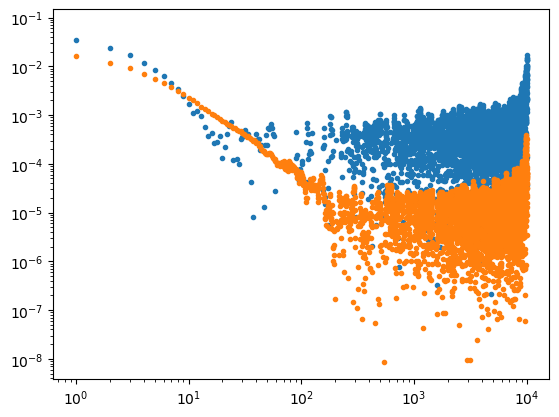

In [20]:
import matplotlib.pyplot as plt
plt.loglog(intra.t, intra.gij[0], '.')
plt.loglog(intra.t, inter.gij[0], '.')

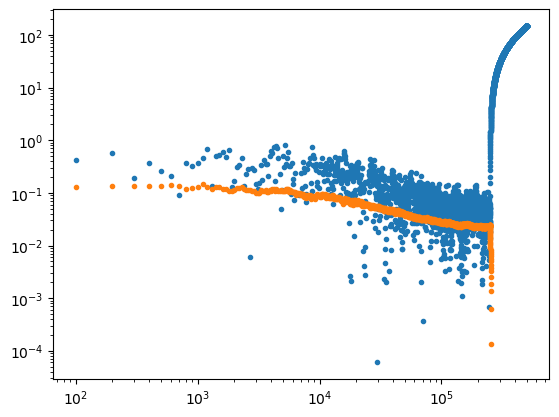

In [19]:
import matplotlib.pyplot as plt
plt.loglog(intra.f, intra.R1, '.')
plt.loglog(intra.f, inter.R1, '.')

In [ ]:

    ALL = u.select_atoms("all")
    
    N = save_result(nmr, name = "T"+T)
    if T == "0.6":
        print("Number of cycle:")